In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_699279.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_902638.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_617871.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_266522.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_470425.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_387936.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_418203.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_461013.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_482763.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_993312.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_795851.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_358488.jpg
/kaggle/input/bl

In [9]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Checking GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [13]:
data_dir = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/'  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # <<< You missed this line earlier
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 13677 images belonging to 8 classes.
Found 3415 images belonging to 8 classes.


In [17]:
# Step 3: Building the CNN Model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(250,250, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(8, activation='softmax') 
])

# Compiling the Model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_epoch_{epoch:02d}.keras",  # Save file as 'model_epoch_01.h5', 'model_epoch_02.h5', etc.
                             save_weights_only=False,  # Saves the entire model (architecture + weights)
                             save_freq='epoch',        # Save after every epoch
                             verbose=1)
history = model.fit(
    train_generator,
    epochs=35,
    validation_data=validation_generator,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/35
854/855 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2943 - loss: 1.8206
Epoch 1: saving model to model_epoch_01.keras
855/855 ━━━━━━━━━━━━━━━━━━━━ 65s 71ms/step - accuracy: 0.2946 - loss: 1.8201 - val_accuracy: 0.6389 - val_loss: 1.0579
Epoch 2/35
854/855 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6003 - loss: 1.0278
Epoch 2: saving model to model_epoch_02.keras
855/855 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.6004 - loss: 1.0277 - val_accuracy: 0.7083 - val_loss: 0.7407
Epoch 3/35
855/855 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6821 - loss: 0.8139
Epoch 3: saving model to model_epoch_03.keras
855/855 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.6821 - loss: 0.8138 - val_accuracy: 0.8149 - val_loss: 0.5753
Epoch 4/35
855/855 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7238 - loss: 0.7145
Epoch 4: saving model to model_epoch_04.keras
855/855 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.7238 - loss: 0.7145 - val_accuracy: 0.8363 - val_loss:

In [20]:
model.save('blood_classification.h5')

214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step

Classification Report:

              precision    recall  f1-score   support

    basophil       0.09      0.09      0.09       243
  eosinophil       0.20      0.20      0.20       623
erythroblast       0.12      0.11      0.11       310
          ig       0.16      0.15      0.15       579
  lymphocyte       0.07      0.08      0.08       242
    monocyte       0.08      0.10      0.09       284
  neutrophil       0.20      0.20      0.20       665
    platelet       0.10      0.10      0.10       469

    accuracy                           0.14      3415
   macro avg       0.13      0.13      0.13      3415
weighted avg       0.15      0.14      0.14      3415



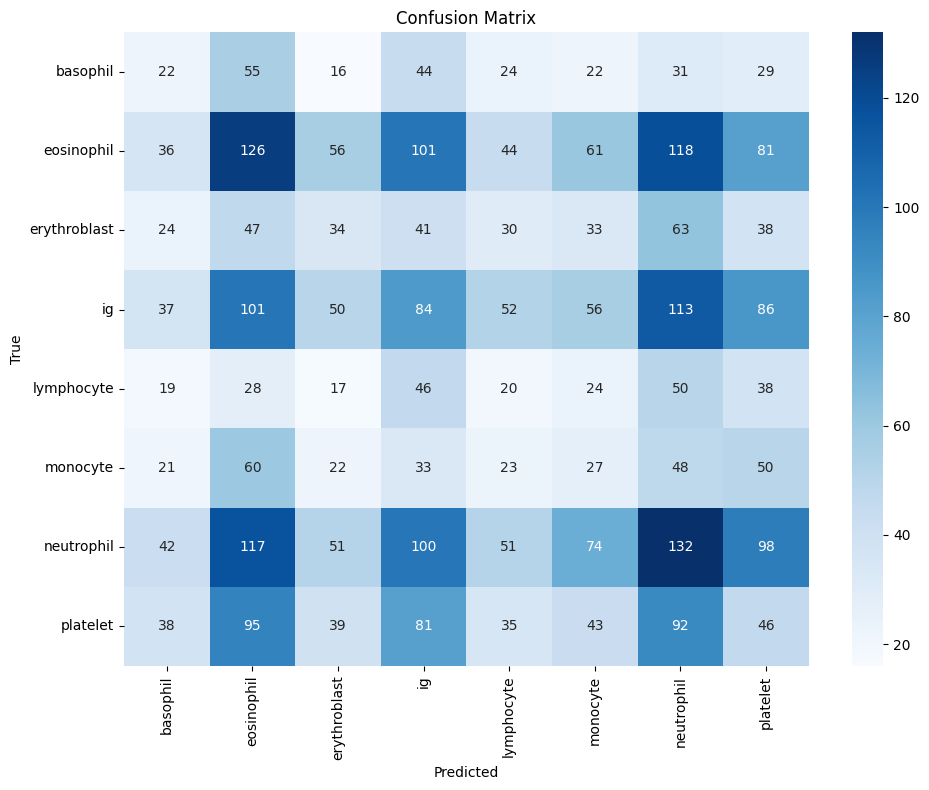

In [22]:
predictions = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Step 3: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Step 5: Plot Training History
# Assuming you have 'history' object from model.fit()
def plot_history(history):
    # Accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

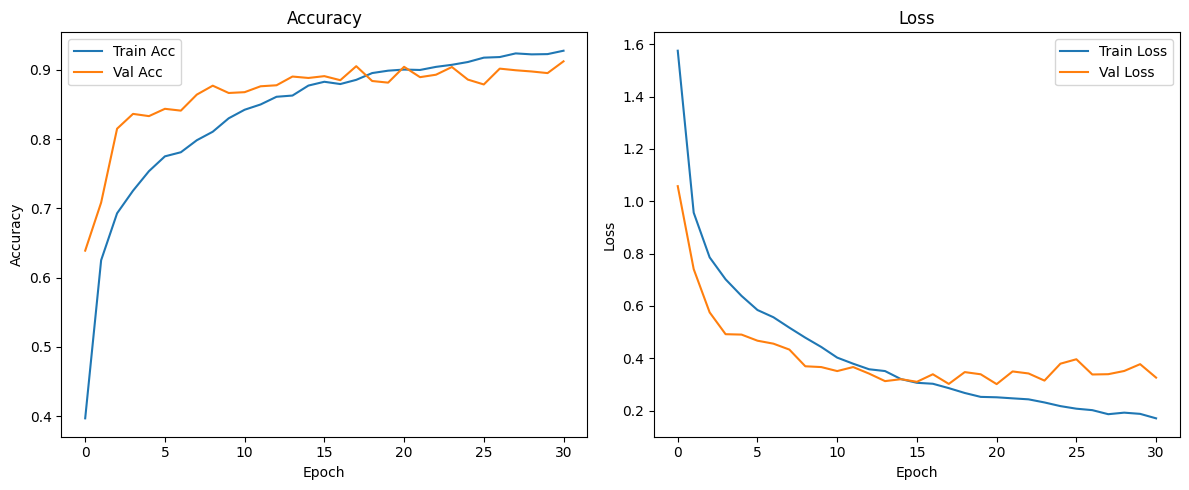

In [23]:
plot_history(history)

In [24]:
correct = (y_pred == y_true)
class_total = np.bincount(y_true)
class_correct = np.bincount(y_true, weights=correct)
per_class_accuracy = class_correct / class_total

print("\nPer-Class Accuracy:\n")
for label, acc in zip(class_labels, per_class_accuracy):
    print(f"{label}: {acc * 100:.2f}%")


Per-Class Accuracy:

basophil: 9.05%
eosinophil: 20.22%
erythroblast: 10.97%
ig: 14.51%
lymphocyte: 8.26%
monocyte: 9.51%
neutrophil: 19.85%
platelet: 9.81%
